# Logistic Regression

In [164]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
pwd = os.getcwd()
path = pwd + '/asn2/data/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1

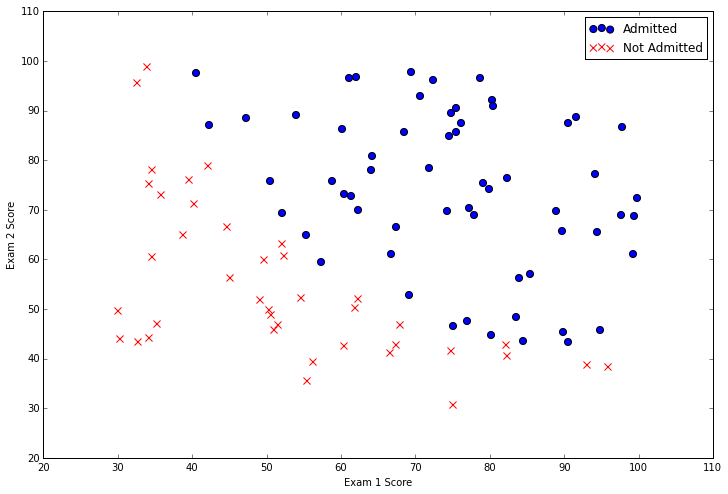

In [166]:
# Find the data where the 'Admitted' column is true or false
admitted = data[data['Admitted'].isin([1])]
rejected = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(admitted['Exam 1'], admitted['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(rejected['Exam 1'], rejected['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

# Implementation

## Sigmoid Function

In this case, our hypothesis function isn't going to be what we're used to. It's going to be using what's called the *Sigmoid Function*. We'll represent out usual 'compute_hypothesis' function with the sigmoid function instead of the regular hypothesis

In [167]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

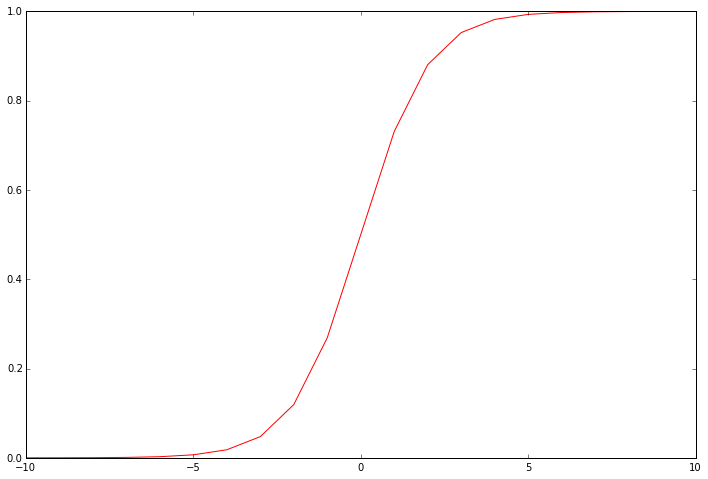

In [168]:
# array of ints from -10 to 10
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(nums, sigmoid(nums), 'r')

## Cost Function

In [169]:
# original implementation used in tutorial
def original_cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    
    return np.sum(first - second) / (len(X))

# our implementation to represent the theory better. We'll use this
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    h = sigmoid(X * theta.T)
    m = len(X)
    
    return (1.0 / m) * np.sum(np.multiply(-y, np.log(h)) - np.multiply((1 - y), np.log(1 - h)))

In [170]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training daya) and y (target variable)
num_cols = data.shape[1]
X = data.iloc[:, :num_cols - 1]
y = data.iloc[:, num_cols - 1:]

print X.head()

# convert the numpy arrays and initialize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(num_cols - 1)

   Ones     Exam 1     Exam 2
0     1  34.623660  78.024693
1     1  30.286711  43.894998
2     1  35.847409  72.902198
3     1  60.182599  86.308552
4     1  79.032736  75.344376


In [171]:
# check the shapes of your data structures to ensure everything's in order
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (3,))

In [172]:
print original_cost(theta, X, y)
print cost(theta, X, y)

0.69314718056
0.69314718056


## Gradient Descent

We'll be using gradient descent here, but not that for logistic regression, we don't actually perform traditional gradient descent.

We'll compute just a single step, and then use a sophisticated library function for the rest (in the course, Octave used *fminunc* to optimize the parameters given to compute the cost and gradients)

Since we're using Python, we'll use SciPy's optimization API to do the exact same thing

In [173]:
# original implementation used in tutorial
def original_gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:, i])
        grad[i] = np.sum(term) / len(X)
        
    return grad

# convert the numpy arrays and initialize the parameter array theta
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    m = len(X)
    num_parameters = theta.ravel().shape[1]
    h = sigmoid(X * theta.T)
    
    grad = np.array((1.0 / m) * (X.T * (h - y))) # (3, 100) x (100, 1)
    
    return grad

In [174]:
import scipy.optimize as opt

result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
optimized_theta = result[0]
print optimized_theta

cost = cost(optimized_theta, X, y)
print cost

[-25.16131847   0.20623159   0.20147148]
0.203497701589


## Prediction

In [193]:
# TODO: Look at making theta a matrix, not an ndarray. Need 2 dimensions
# for proper dot product. The tutorial ignores this.

def predict(theta, X):
    theta = np.matrix(theta)
    
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

predictions = predict(optimized_theta.T, X)

correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print 'accuracy = {0}%'.format(accuracy)

accuracy = 89%


# Regularized Logistic Regression